In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
#display(data.shape)
#data.head()

In [6]:
new_cols = []
def column_names(df):
    for i in df.columns:
        x = i.lower().replace(' ','_')
        new_cols.append(x)
    df.columns = new_cols
    display(df.head())
    
column_names(data)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
data_cat = data.select_dtypes(include=object)
data_cat.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


Plot all the categorical variables with the proper plot. What can you see?

<AxesSubplot:xlabel='policy', ylabel='count'>

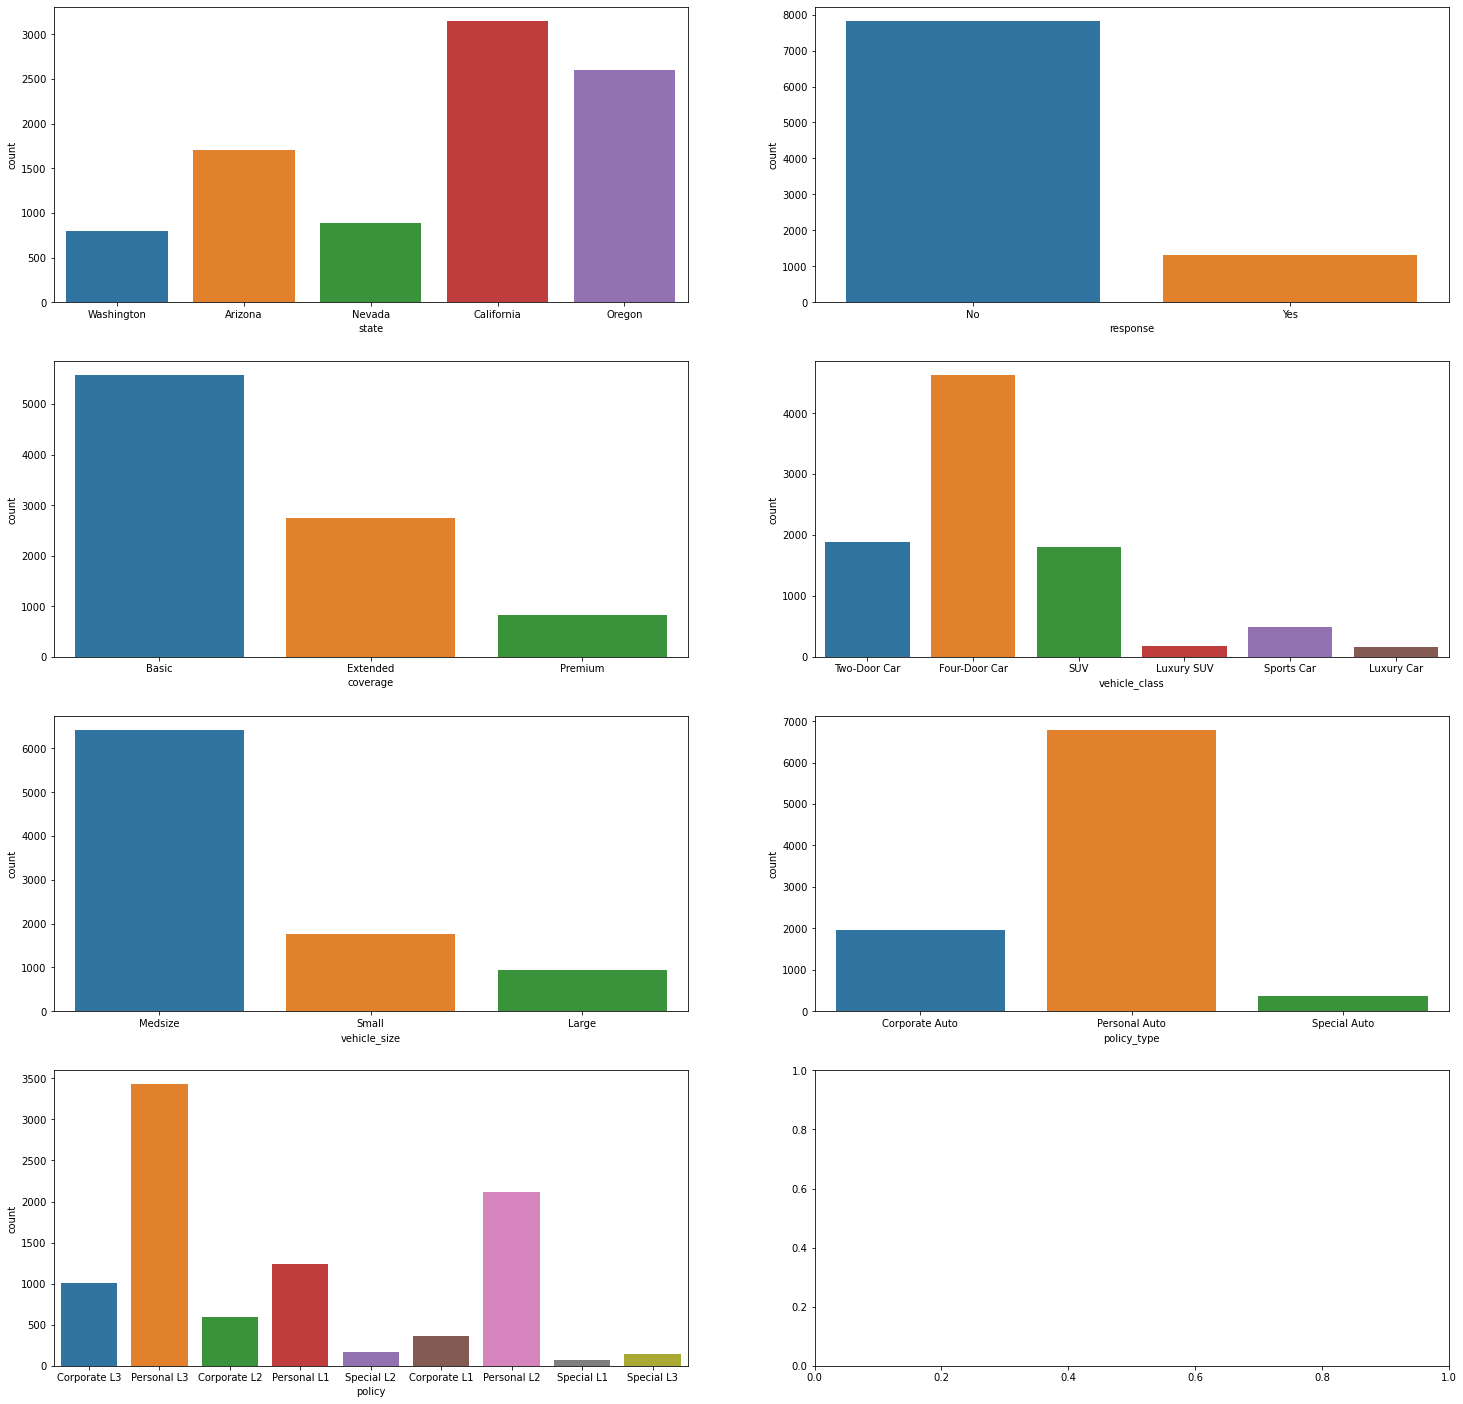

In [10]:
fig, ax1 = plt.subplots(4,2,figsize=(25,25)) 
sns.countplot(x='state',data=data_cat, ax = ax1[0,0])
sns.countplot(x='response',data=data_cat, ax = ax1[0,1])
sns.countplot(x='coverage',data=data_cat, ax = ax1[1,0])
sns.countplot(x='vehicle_class',data=data_cat, ax = ax1[1,1])
sns.countplot(x='vehicle_size',data=data_cat, ax = ax1[2,0])
sns.countplot(x='policy_type',data=data_cat, ax = ax1[2,1])
sns.countplot(x='policy',data=data_cat, ax = ax1[3,0])

<AxesSubplot:xlabel='policy_type', ylabel='Count'>

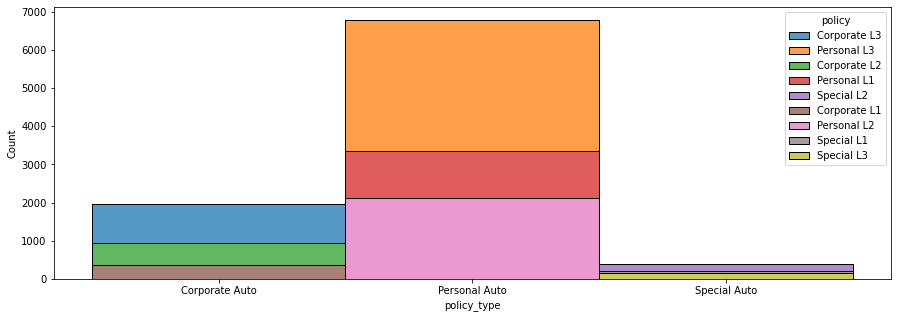

In [22]:
fig, ax1 = plt.subplots(1,1,figsize=(15,5)) 
sns.histplot(binwidth=0.5, x="policy_type", hue="policy", data=data_cat, stat="count", multiple="stack")

<AxesSubplot:xlabel='vehicle_class', ylabel='Count'>

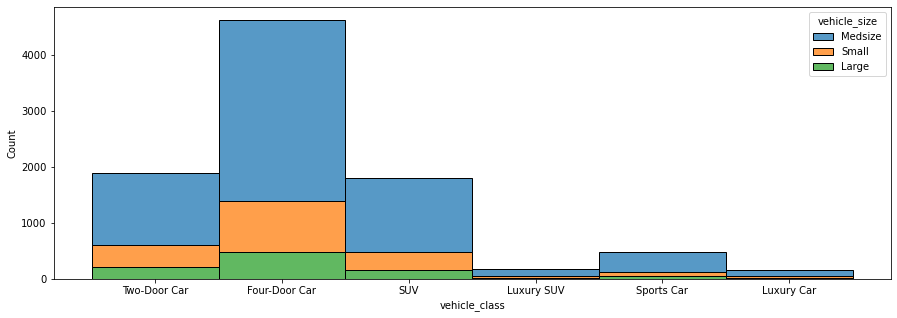

In [23]:
fig, ax1 = plt.subplots(1,1,figsize=(15,5)) 
sns.histplot(binwidth=0.5, x="vehicle_class", hue="vehicle_size", data=data_cat, stat="count", multiple="stack")

There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

there is a level of redundency between policy_type and policy.I would dropy policy type and keep policy given the level of granularity in in policy. the "L1, L2,L3" may correpsond to the coverage ( basic, premium, extended) or it might mean something else that is of value which is currently unclear. should "L1, L2,L3" correspond to the coverage, we can also drop out coverage given that it is already captured in policy 

Plot time variable. Can you extract something from it?

In [24]:
import time
from datetime import date
from datetime import datetime
from datetime import timedelta

In [25]:
data_cat.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [26]:
data_cat['effective_to_date'] = pd.to_datetime(data_cat['effective_to_date'], errors='coerce')

In [27]:
data_cat['etd_day'] = data_cat.effective_to_date.apply(lambda x: x.day)
data_cat['etd_month'] = data_cat.effective_to_date.apply(lambda x: x.month)

<AxesSubplot:xlabel='etd_day', ylabel='Count'>

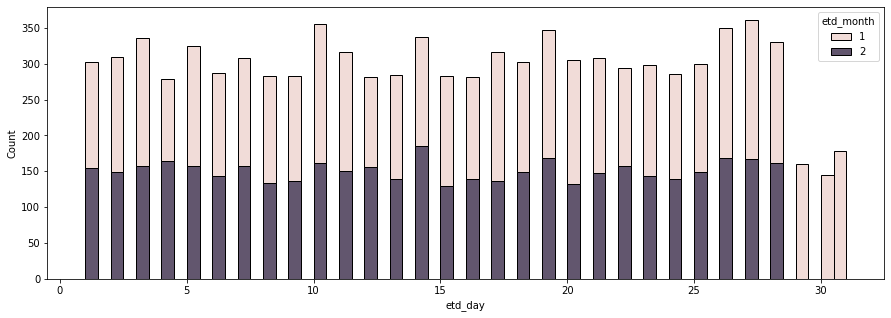

In [29]:
fig, ax1 = plt.subplots(1,1,figsize=(15,5)) 
sns.histplot(binwidth=0.5, x="etd_day", hue="etd_month", data=data_cat, stat="count", multiple="stack")

time data shows the following insights:

> Only 2 months are captured in the data frame: January and Frebruary. this is not a leap year given there are no records on the 29th of January. 

> with the exception of the 4th,11th,14th,19th and 2th to 28th of any one months, the counts of entries on any one day are more or less of the same volume in any one month. months on months variations, while existing are small.

> It will be interesting to check if the increased activity on  4th,11th,14th,19th and 2th to 28th can be explained through the sales channel acitivity variation. for example, whether these higher numbers were driven by agents before the 10th, 19th and the end of any one month. 

> the date is not enough to explain any seasonal variation given both months are winter months. 

